<a href="https://colab.research.google.com/github/amitbisht99/resume_project_challenge_1/blob/main/fact_bookings_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv ("/content/fact_bookings.csv")

# **Data Exploration**

In [3]:
print (f"There are", df1.shape[0], "rows in the dataset.")

There are 134590 rows in the dataset.


In [4]:
print (f"There are", df1.shape[1], "columns in the dataset.")

There are 12 columns in the dataset.


In [5]:
print (f"The total size of dataset is", df1.size, ".")

The total size of dataset is 1615080 .


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


# **Data Cleaning**

## **Handling Missing Values**

In [9]:
# searching columns with missing values
print (f"Columns with Missing Values -\n", df1.columns[df1.isna().any()].tolist())

Columns with Missing Values -
 ['ratings_given']


In [12]:
# total no. of missing values in the column
print (f"There are", df1['ratings_given'].isna().sum(), "missing values in the [ratings_given] column.")

There are 77907 missing values in the [ratings_given] column.


In [14]:
# total % of missing values in the column
print (f"There are", round((df1['ratings_given'].isna().sum()/df1.shape[0])*100),"% missing values in the [ratings_given] column.")

There are 58 % missing values in the [ratings_given] column.


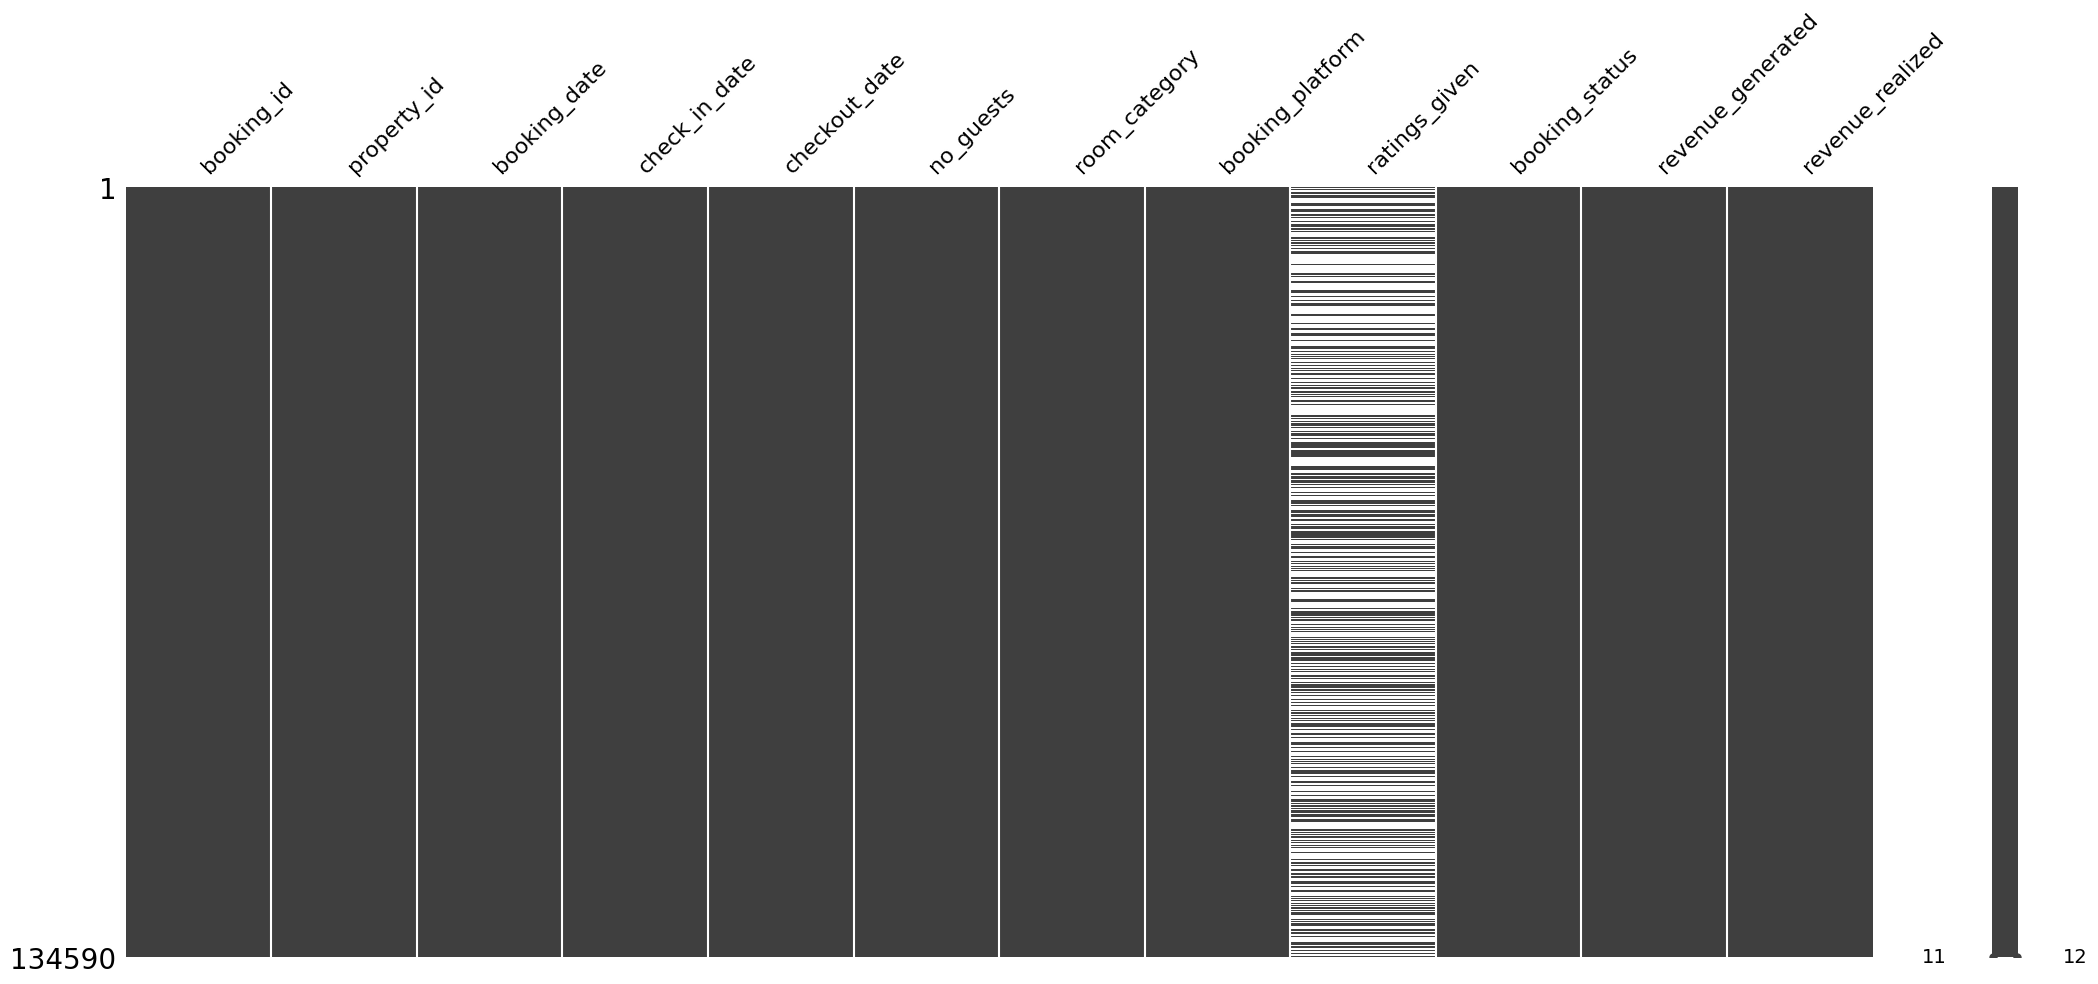

In [15]:
# visualing missing values in the dataset
import missingno as msn
msn.matrix (df1)
plt.show()

In [16]:
# deleted the column with missing values
df1.drop('ratings_given', axis=1, inplace=True)

In [18]:
# confirming about columns with missing values in the dataset
if df1.isna().any().any():
    print(f"Columns with missing values are -\n", df1.columns[df1.isna().any()].tolist())
else:
    print("No Columns with missing values found.")

No Columns with missing values found.


## **Handling Outlier**

### Column: property_id

In [19]:
# checking outliers
suspect_cols = ['property_id']
for col in suspect_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

No outliers found in property_id


### Column: no_guests

In [20]:
# checking outliers
suspect_cols = ['no_guests']
for col in suspect_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

Outliers in no_guests:
               booking_id  property_id booking_date check_in_date  \
4        May012216558RT15        16558   2022-04-27    2022-05-01   
15      May012216558RT116        16558   2022-04-27    2022-05-01   
31      May012216558RT214        16558   2022-04-26    2022-05-01   
34      May012216558RT217        16558   2022-04-29    2022-05-01   
40       May012216558RT32        16558   2022-04-24    2022-05-01   
...                   ...          ...          ...           ...   
134562  Jul312217564RT213        17564   2022-07-30    2022-07-31   
134570   Jul312217564RT32        17564   2022-07-31    2022-07-31   
134575   Jul312217564RT37        17564   2022-07-31    2022-07-31   
134581   Jul312217564RT42        17564   2022-07-31    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   

       checkout_date  no_guests room_category booking_platform booking_status  \
4         2022-05-02          4           RT1    direct online    C

<function matplotlib.pyplot.show(close=None, block=None)>

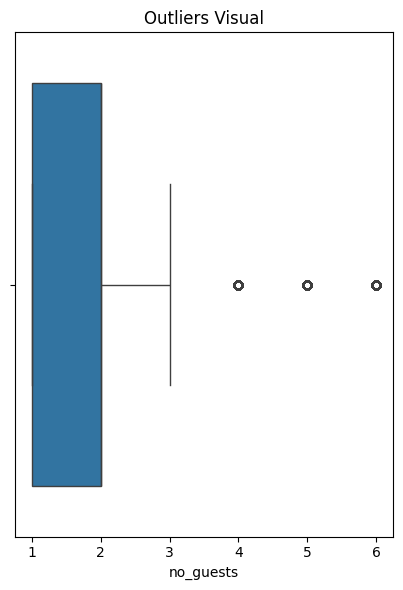

In [21]:
# visual of outliers pre-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['no_guests'])

plt.title(" Pre-Outliers Visual")

plt.tight_layout()
plt.show

In [22]:
# removing outliers using IQR method
Q1 = df1['no_guests'].quantile(0.25)
Q3 = df1['no_guests'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1['no_guests'] = np.clip(df1['no_guests'], lower_bound, upper_bound)

<function matplotlib.pyplot.show(close=None, block=None)>

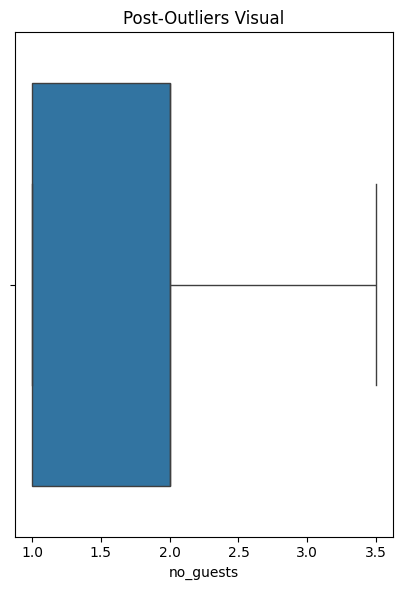

In [23]:
# visual of outliers post-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['no_guests'])

plt.title("Post-Outliers Visual")

plt.tight_layout()
plt.show

### Column: revenue_generated

In [24]:
# checking outliers
suspect_cols = ['revenue_generated']
for col in suspect_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

Outliers in revenue_generated:
               booking_id  property_id booking_date check_in_date  \
137      May012216559RT41        16559   2022-04-27    2022-05-01   
138      May012216559RT42        16559   2022-04-11    2022-05-01   
139      May012216559RT43        16559   2022-05-01    2022-05-01   
140      May012216559RT44        16559   2022-04-28    2022-05-01   
141      May012216559RT45        16559   2022-04-28    2022-05-01   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   
134587   Jul312217564RT48        17564   2022-07-30    2022-07-31   
134588   Jul312217564RT49        17564   2022-07-29    2022-07-31   
134589  Jul312217564RT410        17564   2022-07-31    2022-07-31   

       checkout_date  no_guests room_category booking_platform booking_status  \
137       2022-05-07        3.5           RT4           oth

<function matplotlib.pyplot.show(close=None, block=None)>

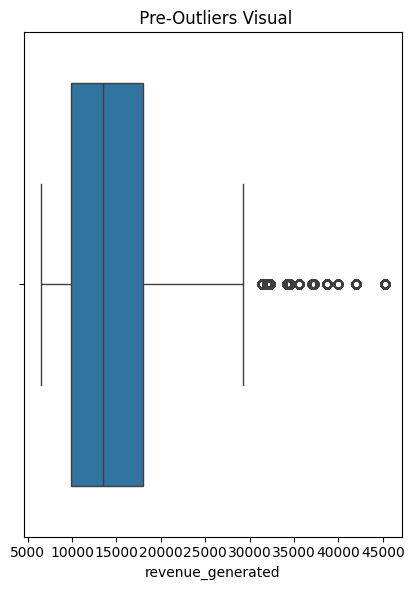

In [25]:
# visual of outliers pre-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['revenue_generated'])

plt.title(" Pre-Outliers Visual")

plt.tight_layout()
plt.show

In [26]:
# removing outliers using IQR method
Q1 = df1['revenue_generated'].quantile(0.25)
Q3 = df1['revenue_generated'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1['revenue_generated'] = np.clip(df1['revenue_generated'], lower_bound, upper_bound)

<function matplotlib.pyplot.show(close=None, block=None)>

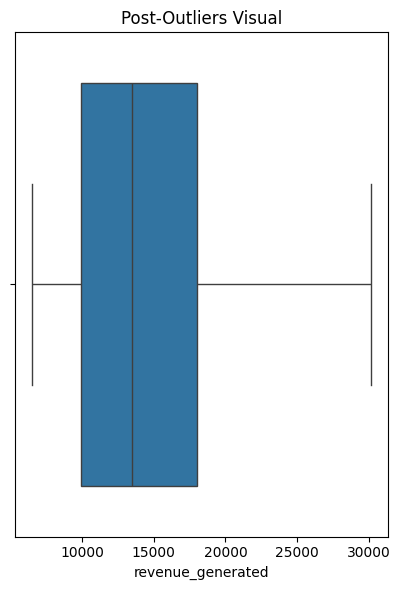

In [28]:
# visual of outliers post-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['revenue_generated'])

plt.title("Post-Outliers Visual")

plt.tight_layout()
plt.show

### Column: revenue_realized

In [31]:
# checking outliers
suspect_cols = ['revenue_realized']
for col in suspect_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

Outliers in revenue_realized:
              booking_id  property_id booking_date check_in_date  \
111     May012216559RT32        16559   2022-04-29    2022-05-01   
113     May012216559RT34        16559   2022-04-10    2022-05-01   
137     May012216559RT41        16559   2022-04-27    2022-05-01   
139     May012216559RT43        16559   2022-05-01    2022-05-01   
140     May012216559RT44        16559   2022-04-28    2022-05-01   
...                  ...          ...          ...           ...   
134582  Jul312217564RT43        17564   2022-07-31    2022-07-31   
134584  Jul312217564RT45        17564   2022-07-30    2022-07-31   
134585  Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586  Jul312217564RT47        17564   2022-07-30    2022-07-31   
134588  Jul312217564RT49        17564   2022-07-29    2022-07-31   

       checkout_date  no_guests room_category booking_platform booking_status  \
111       2022-05-02        3.5           RT3    direct online    Checke

<function matplotlib.pyplot.show(close=None, block=None)>

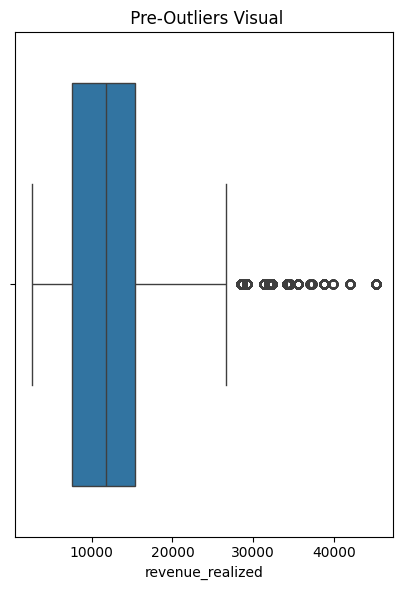

In [32]:
# visual of outliers pre-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['revenue_realized'])

plt.title(" Pre-Outliers Visual")

plt.tight_layout()
plt.show

In [35]:
# removing outliers using IQR method
Q1 = df1['revenue_realized'].quantile(0.25)
Q3 = df1['revenue_realized'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1['revenue_realized'] = np.clip(df1['revenue_realized'], lower_bound, upper_bound)

<function matplotlib.pyplot.show(close=None, block=None)>

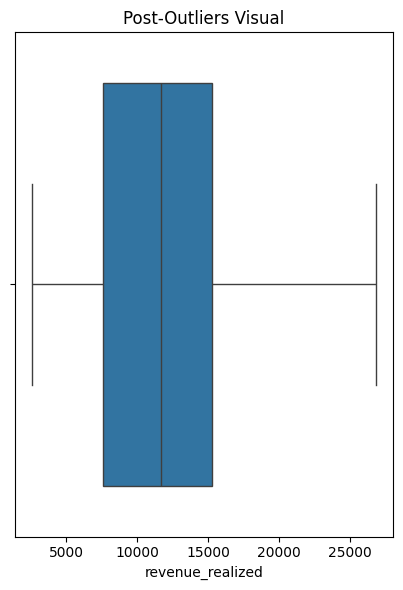

In [36]:
# visual of outliers post-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df1['revenue_realized'])

plt.title("Post-Outliers Visual")

plt.tight_layout()
plt.show

## **Checking Inconsistencies**

In [37]:
df1.sample()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
13630,May092217563RT46,17563,2022-05-08,2022-05-09,2022-05-10,1.0,RT4,others,Checked Out,30150,26850


In [38]:
# checking data types of different columns pre-handling
df1.dtypes

,0
booking_id,object
property_id,int64
booking_date,object
check_in_date,object
checkout_date,object
no_guests,float64
room_category,object
booking_platform,object
booking_status,object
revenue_generated,int64


In [39]:
# correcting the incorrect data types of columns
df1[['booking_date', 'check_in_date',	'checkout_date']] = df1[['booking_date', 'check_in_date',	'checkout_date']].astype('datetime64[ns]')

In [40]:
# confirming the data types post-handling
df1.dtypes

,0
booking_id,object
property_id,int64
booking_date,datetime64[ns]
check_in_date,datetime64[ns]
checkout_date,datetime64[ns]
no_guests,float64
room_category,object
booking_platform,object
booking_status,object
revenue_generated,int64


In [42]:
df1['no_guests'] = df1['no_guests'].astype('int64')

In [43]:
df1.dtypes

,0
booking_id,object
property_id,int64
booking_date,datetime64[ns]
check_in_date,datetime64[ns]
checkout_date,datetime64[ns]
no_guests,int64
room_category,object
booking_platform,object
booking_status,object
revenue_generated,int64


In [45]:
df1.sample()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
65231,Jun132219561RT26,19561,2022-05-23,2022-06-13,2022-06-14,2,RT2,journey,Cancelled,13500,5400


In [46]:
df1.to_csv("facts booking cleaned.csv", index = False)